In [71]:
import matplotlib.pyplot as plt

from livae.utils import load_image_from_h5
from livae.data import PatchDataset, LatticeGridDataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
images = []

# open data files and load all h5 files
data_dir = "../data/"
file_names = [
    "HAADF1.h5",
    "HAADF2.h5",
    "HAADF3.h5",
]
for file_name in file_names:
    file_path = data_dir + file_name
    image = load_image_from_h5(file_path, "Measurement_000/Channel_000/HAADF/HAADF")
    images.append(image)
    print(f"Loaded {file_name} with shape {image.shape}")

Loaded HAADF1.h5 with shape (2048, 2048)
Loaded HAADF2.h5 with shape (2048, 2048)
Loaded HAADF3.h5 with shape (2048, 2048)


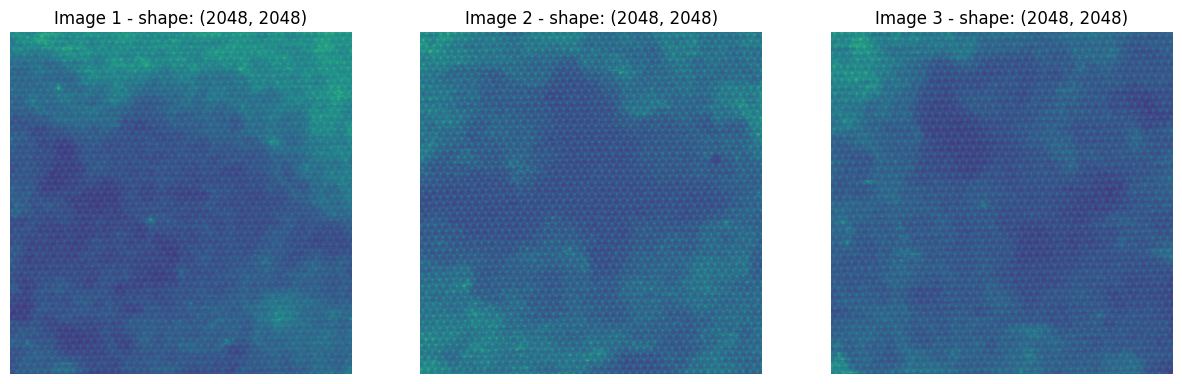

In [3]:
fig = plt.figure(figsize=(15, 5))
for i, image in enumerate(images):
    ax = fig.add_subplot(1, len(images), i + 1)
    ax.imshow(image)
    ax.set_title(f"Image {i + 1} - shape: {image.shape}")
    ax.axis("off")
plt.show()

In [67]:
ds = PatchDataset(images, patch_size=128)
print(f"Created PatchDataset with {len(ds)} patches")

Detected 4916 atoms, 4363 after edge exclusion.
Detected 4959 atoms, 4370 after edge exclusion.
Detected 4959 atoms, 4370 after edge exclusion.
Detected 4776 atoms, 4198 after edge exclusion.
Created PatchDataset with 12931 patches
Detected 4776 atoms, 4198 after edge exclusion.
Created PatchDataset with 12931 patches


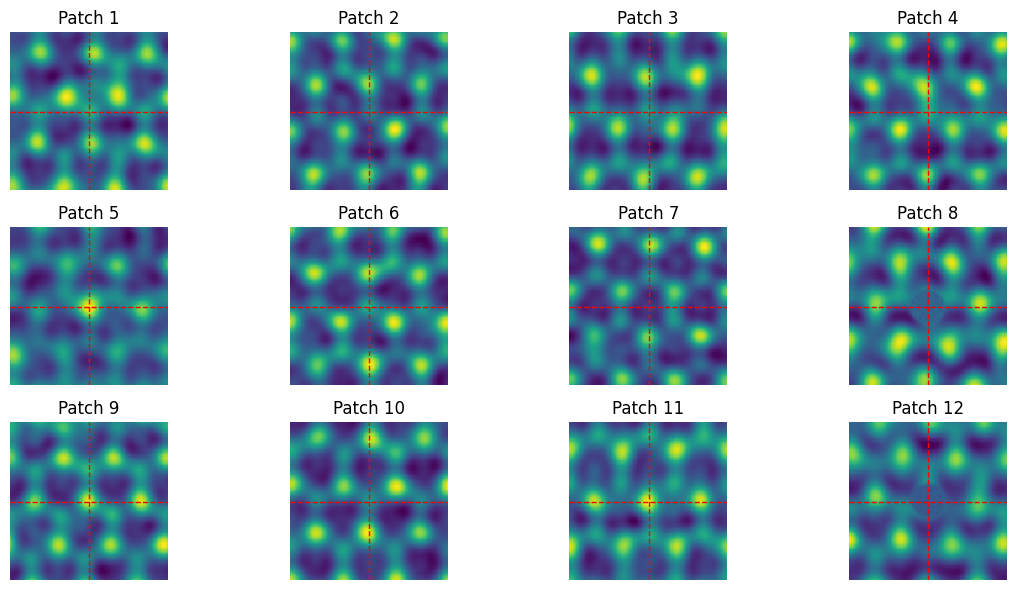

In [68]:
import random
fig = plt.figure(figsize=(12, 6))
for i in range(12):
    random_index = random.randint(0, len(ds) - 1)
    patch = ds[random_index]
    patch_img = patch.squeeze()
    ax = fig.add_subplot(3, 4, i + 1)
    ax.imshow(patch_img, interpolation='none')
    # plot center crosshairs
    center = patch_img.shape[0] // 2
    ax.axhline(center, color='red', linestyle='--', linewidth=1)
    ax.axvline(center, color='red', linestyle='--', linewidth=1)
    ax.set_title(f"Patch {i + 1}")
    ax.axis("off")
plt.tight_layout()
plt.show()

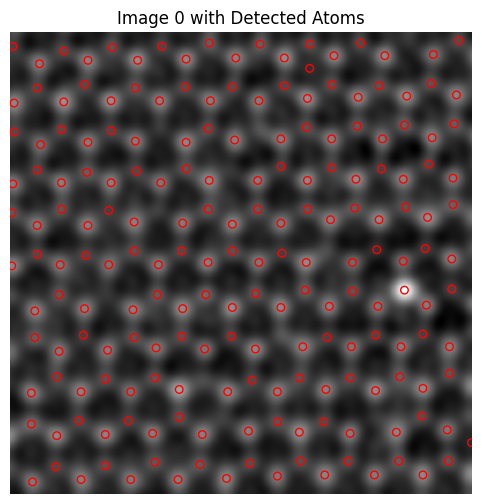

In [69]:
ds.plot_peaks(0, size=400, offset=(900,500))

In [83]:
grid_ds = LatticeGridDataset(images, patch_size=128)

Grid: 1560 points total - 1379 atoms, 181 vacancies
Grid: 1560 points total - 1366 atoms, 194 vacancies
Grid: 1560 points total - 1366 atoms, 194 vacancies
Grid: 1450 points total - 1279 atoms, 171 vacancies
Grid: 1450 points total - 1279 atoms, 171 vacancies


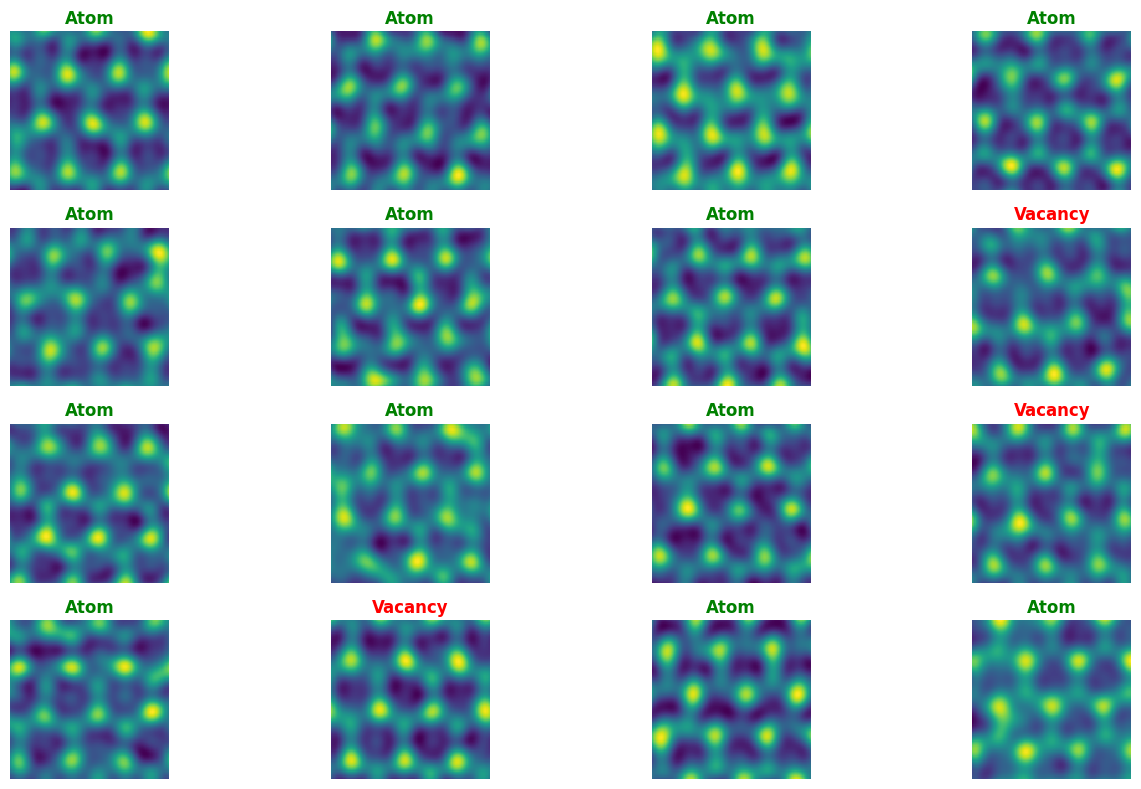

In [84]:
# Sample patches - now with labels!
fig = plt.figure(figsize=(14, 8))
for i in range(16):
    random_index = random.randint(0, len(grid_ds) - 1)
    patch, label = grid_ds[random_index]
    patch_img = patch.squeeze()
    
    ax = fig.add_subplot(4, 4, i + 1)
    ax.imshow(patch_img, interpolation='none')
    
    # Color-code by label
    title_color = 'green' if label == 1 else 'red'
    label_text = 'Atom' if label == 1 else 'Vacancy'
    ax.set_title(f"{label_text}", color=title_color, fontweight='bold')
    ax.axis("off")
    
plt.tight_layout()
plt.show()

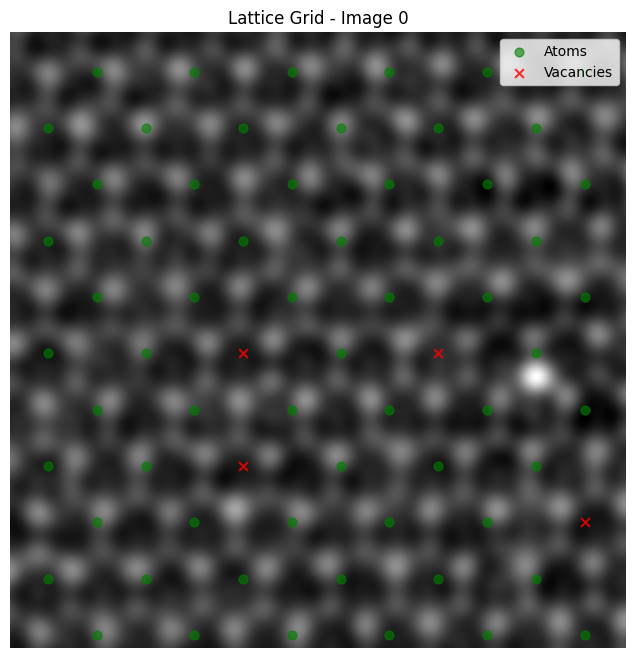

In [85]:
# Visualize the grid with atom/vacancy labels
grid_ds.plot_grid(0, size=400, offset=(900, 500))
# grid_ds.plot_grid(0, size=400, offset=(0, 0))

In [77]:
from livae.data import LatticeGridDataset

# Create grid-based dataset
grid_ds = LatticeGridDataset(images, patch_size=128, vacancy_threshold=0.5)
print(f"Created LatticeGridDataset with {len(grid_ds)} patches")

Grid: 1560 points total - 1379 atoms, 181 vacancies
Grid: 1560 points total - 1366 atoms, 194 vacancies
Grid: 1450 points total - 1279 atoms, 171 vacancies
Created LatticeGridDataset with 4570 patches


## Testing LatticeGridDataset

The grid-based approach samples at **all expected lattice positions**, not just detected peaks. This naturally captures vacancies without needing synthetic generation.

In [102]:
from livae.data import VoronoiVacancyDataset

# Create neighbor-based vacancy detection dataset
voronoi_ds = VoronoiVacancyDataset(images, patch_size=128, vacancy_distance_threshold=1.5)
print(f"Created VoronoiVacancyDataset with {len(voronoi_ds)} patches")

Found 4363 atoms, 1958 vacancy candidates
Found 4370 atoms, 554 vacancy candidates
Found 4198 atoms, 1901 vacancy candidates
Created VoronoiVacancyDataset with 17344 patches


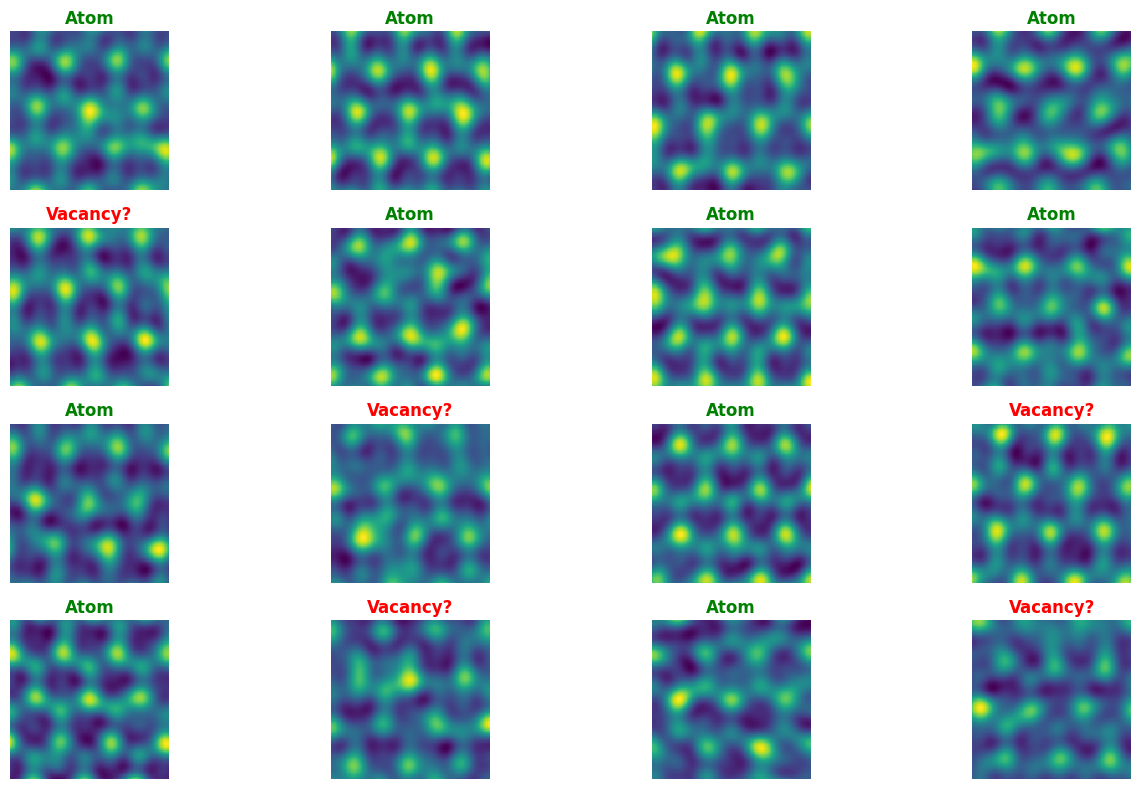

In [103]:
# Sample patches from Voronoi-based dataset
fig = plt.figure(figsize=(14, 8))
for i in range(16):
    random_index = random.randint(0, len(voronoi_ds) - 1)
    patch, label = voronoi_ds[random_index]
    patch_img = patch.squeeze()
    
    ax = fig.add_subplot(4, 4, i + 1)
    ax.imshow(patch_img, interpolation='none')
    
    # Color-code by label
    title_color = 'green' if label == 1 else 'red'
    label_text = 'Atom' if label == 1 else 'Vacancy?'
    ax.set_title(f"{label_text}", color=title_color, fontweight='bold')
    ax.axis("off")
    
plt.tight_layout()
plt.show()

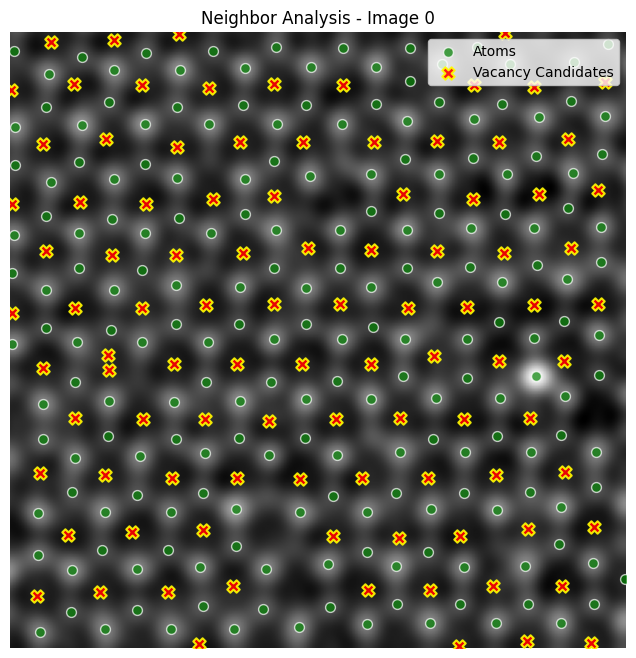

In [104]:
# Visualize detected atoms and inferred vacancy candidates
voronoi_ds.plot_detections(0, size=400, offset=(900, 500))

## Testing VoronoiVacancyDataset

**Better approach**: Instead of a global grid that drifts, analyze **local neighbor distances** to find where atoms are unusually far apart. This adapts to local lattice distortions.

In [105]:
from livae.data import RandomSamplingDataset

# Create random sampling dataset
random_ds = RandomSamplingDataset(images, patch_size=128, non_atom_ratio=0.3, min_distance_from_atom=0.4)
print(f"Created RandomSamplingDataset with {len(random_ds)} patches")

Sampled 4363 atoms, 1308 non-atom positions
Sampled 4370 atoms, 1311 non-atom positions
Sampled 4198 atoms, 1259 non-atom positions
Created RandomSamplingDataset with 16809 patches


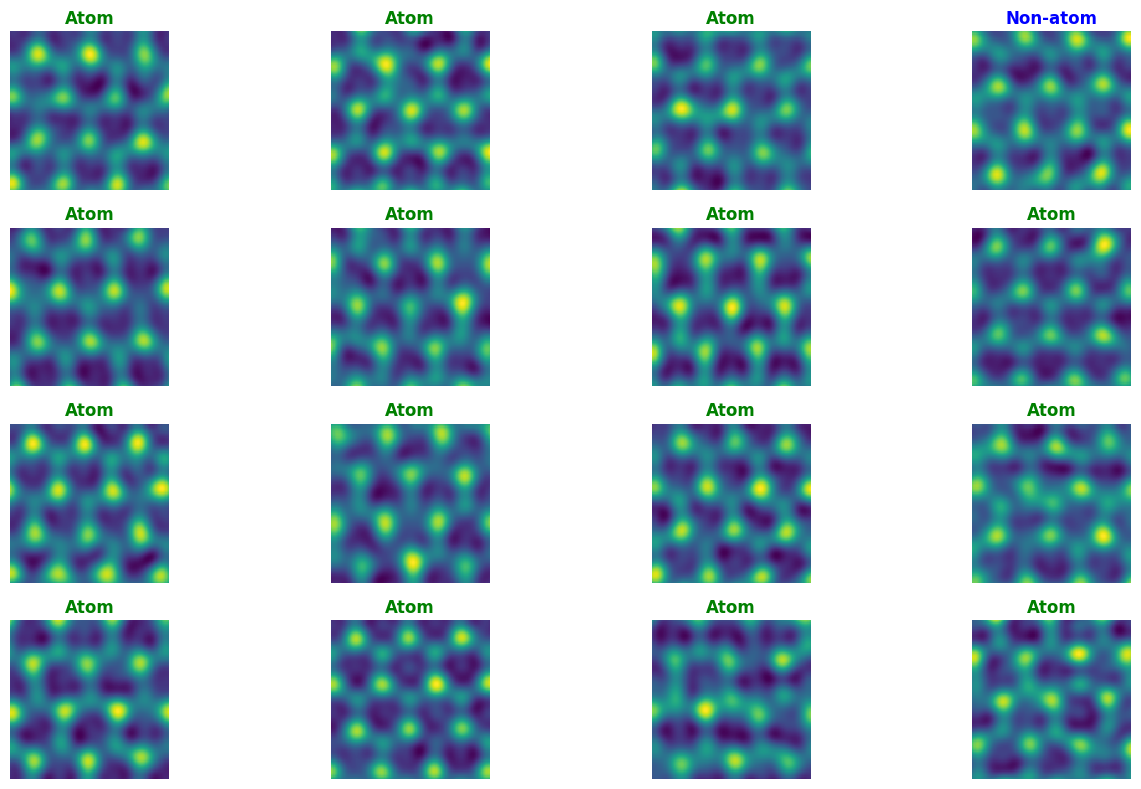

In [106]:
# Sample patches from random dataset
fig = plt.figure(figsize=(14, 8))
for i in range(16):
    random_index = random.randint(0, len(random_ds) - 1)
    patch, label = random_ds[random_index]
    patch_img = patch.squeeze()
    
    ax = fig.add_subplot(4, 4, i + 1)
    ax.imshow(patch_img, interpolation='none')
    
    # Color-code by label
    title_color = 'green' if label == 1 else 'blue'
    label_text = 'Atom' if label == 1 else 'Non-atom'
    ax.set_title(f"{label_text}", color=title_color, fontweight='bold')
    ax.axis("off")
    
plt.tight_layout()
plt.show()

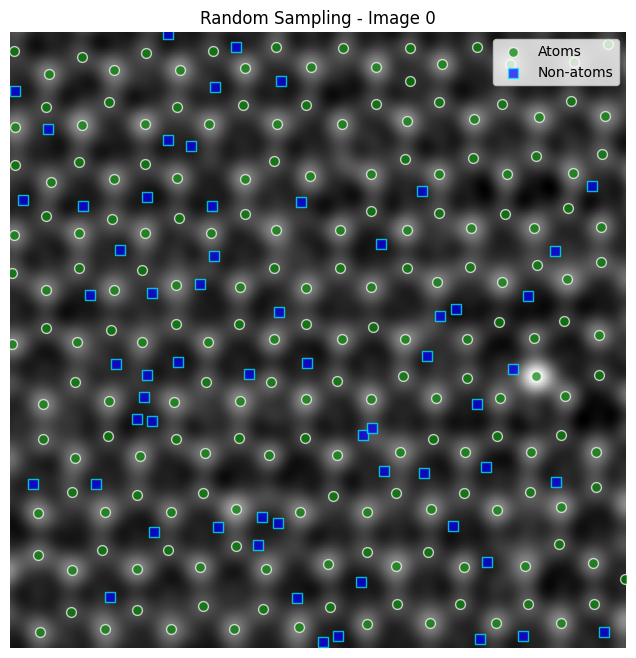

In [107]:
# Visualize atoms and random non-atom samples
random_ds.plot_samples(0, size=400, offset=(900, 500))

## Testing RandomSamplingDataset

**Simplest approach**: Sample all atoms + random positions away from atoms. Let the rVAE model learn to distinguish them - no geometric assumptions needed!

In [172]:
from livae.data import AdaptiveLatticeDataset

# Create adaptive lattice dataset
adaptive_ds = AdaptiveLatticeDataset(images, patch_size=128, detection_threshold=0.6)
print(f"Created AdaptiveLatticeDataset with {len(adaptive_ds)} patches")

Adaptive lattice: 6543 unique sites - 5092 with atoms, 1451 empty sites
Adaptive lattice: 6623 unique sites - 5359 with atoms, 1264 empty sites
Adaptive lattice: 6140 unique sites - 4658 with atoms, 1482 empty sites
Created AdaptiveLatticeDataset with 19306 patches


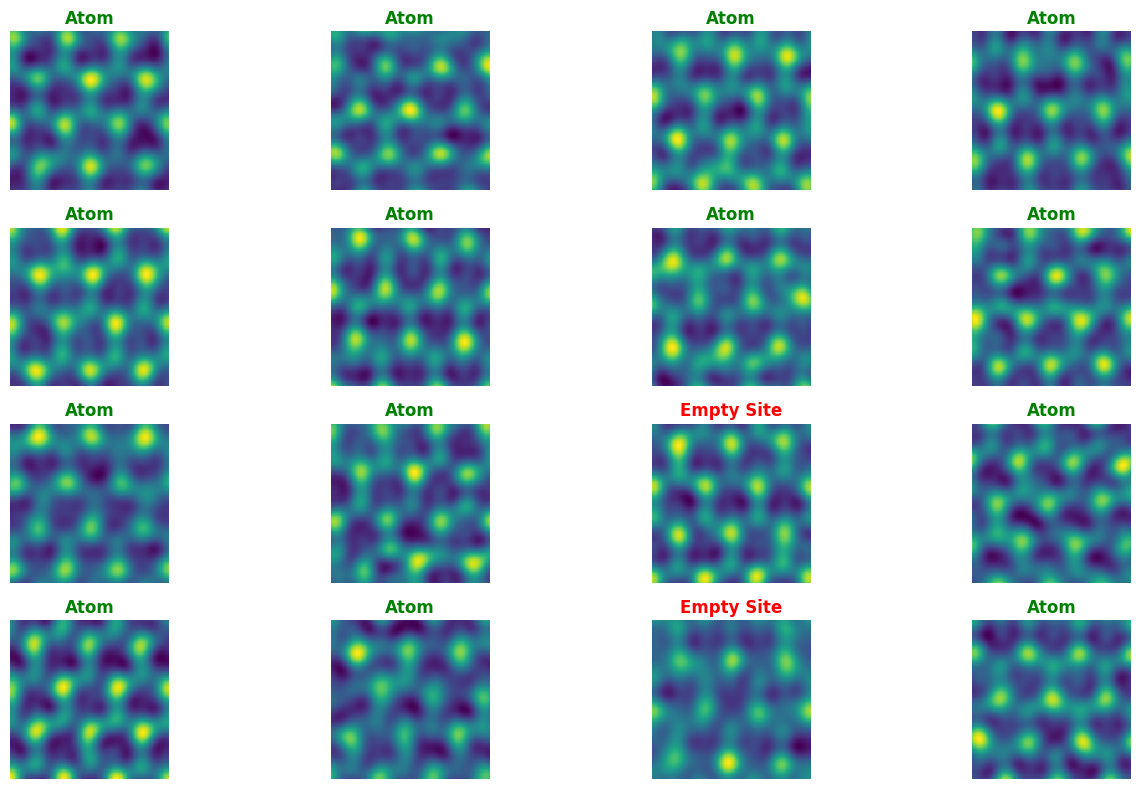

In [173]:
# Sample patches from adaptive dataset
fig = plt.figure(figsize=(14, 8))
for i in range(16):
    random_index = random.randint(0, len(adaptive_ds) - 1)
    patch, label = adaptive_ds[random_index]
    patch_img = patch.squeeze()
    
    ax = fig.add_subplot(4, 4, i + 1)
    ax.imshow(patch_img, interpolation='none')
    
    # Color-code by label
    title_color = 'green' if label == 1 else 'red'
    label_text = 'Atom' if label == 1 else 'Empty Site'
    ax.set_title(f"{label_text}", color=title_color, fontweight='bold')
    ax.axis("off")
    
plt.tight_layout()
plt.show()

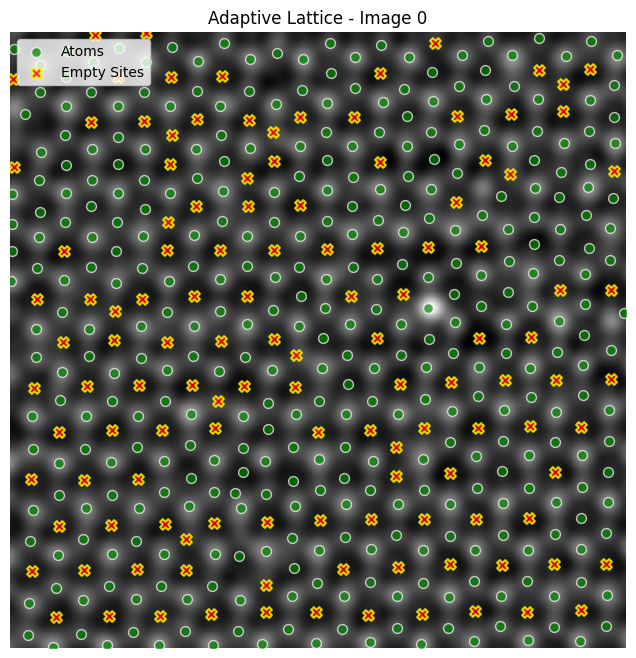

In [174]:
# Visualize adaptive lattice sampling
adaptive_ds.plot_lattice(0, size=500, offset=(900, 500))

## Testing AdaptiveLatticeDataset

**Adaptive approach**: Estimate local lattice vectors from detected atoms and extrapolate to find neighboring sites. Adapts to drift as it grows outward!